The first and still go-to choice model we will study is linear regression.  In this notebook we will also go over many of the essential ideas in machine learning and not only talk about how they are involved in linear regression, but for most every other method we will study as well. 

## Simple Linear Regression

$\hat{y} = \hat{\beta}_{0} + \hat{\beta}_{1}x$

where the 'hat' symbol indicates an estimated value

We want to find coefficients $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$ so that the resulting line is as close as possible to the data.  Although there are several ways of measuring this "fit" or "closeness," the metric we will be most concerned with involves minimizing the residual sum of squares(RSS)

$$RSS = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 $$

The true relationship between X and Y is given by $$Y = \beta_{0} + \beta_{1}X + \epsilon$$

Where $\epsilon$ is the $irreducible$ error, the inherent variation in the data points that there is simply no way to predict

If we divide the RSS by n, the number of observations, we get the ubiquitous metric $Mean$ $Squared$ $Error$ or MSE:
$$MSE = \frac{1}{n}\sum_{i=1}^n (Y_i - \hat{Y}_i)^2$$

If we want to measure the average error in the units of y, we can take the square root of the MSE to get the RMSE:
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n (Y_i - \hat{Y}_i)^2}$$

The other most important metric in linear regression is known as $R^2$ which takes the form:
$$R^2 = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS}$$

Or:
$$R^2 = \frac{\sum_{i=1}^n(y_{i} - \bar{y})^2 - \sum_{i=1}^n(y_{i} - \hat{y}_{i})^2}{\sum_{i=1}^n(y_{i} - \bar{y})^2}$$

$R^2$ usually ranges from 0 to 1, with a value of 0 indicating that none of the variation in the data is explained by our model(no better than guessing) and a value of 1 indicating that our model 'explains' the data perfectly

It is easiest to get an intuitive understanding of these concepts by practicing on a real dataset.  We will be working with mtcars dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading and inspecting the data
df = pd.read_csv('./ames_housing_train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# For now, I will just simply remove all the columns with any missing values from the dataframe
df.dropna(axis = 1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

In [8]:
# notice that many of the columns have datatype 'object', which means they are strings.  No machine learning models
# accept strings.  We can either drop them from our model, or find a way to convert them to numbers while retaining the
# information they contain.  The usual way to do this is to convert them to dummy variables

In [9]:
# for now, i'll just drop all the non-numeric columns for simplicity
df = df.select_dtypes(exclude='object')

In [10]:
# confirming all the object columns have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageCars       1460 non-null int64
Garag

In [11]:
y = df['SalePrice']
df.corrwith(y).sort_values(ascending = False)[1:10]


OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
dtype: float64

In [12]:
columns = pd.DataFrame(df.corrwith(y).sort_values(ascending = False)[1:10]).index

In [13]:
# importing linear regression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
lm = LinearRegression()
X = df[columns]
lm.fit(X, y)
y_pred = lm.predict(X)

In [15]:
print("R2 score is: ", lm.score(X, y))
print("RMSE is: ", np.sqrt(mean_squared_error(lm.predict(X), y)))

R2 score is:  0.770302545034713
RMSE is:  38061.17821427572


An R2 score of .73 for a linear regression is not very good.  More intuitively, if we examine the RMSE our model achieved: 41164, we see that on average, our model incorrectly predicted a price difference of +- $41,164 dollars! What are some things we did wrong? 

In [16]:
# performing eda

# Standardizing the data

# transforming the data

# using cross validation on the data

# using qualitative data(dummy variables)

# accounting for collinearity



## remember the 5 assumptions of multiple linear regression:

---

1. **Linearity:** $Y$ must have an approximately linear relationship with each independent $X_k$.
2. **Independence of Errors:** Errors (residuals) $\varepsilon_i$ and $\varepsilon_j$ must be independent of one another for any $i \ne j$.
3. **Normality:** The errors (residuals) follow a Normal distribution with mean 0.
4. **Equality of Variances**: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the $X_i$ predictors. (There should be no discernable relationship between the $X$ predictors and the residuals.)
5. **Independence of Predictors**: The independent variables $X_k$ and $X_l$ must be independent of one another for any $k \ne l$.

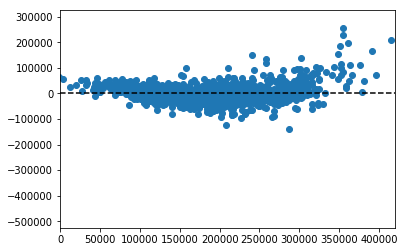

In [17]:
plt.scatter(y_pred, y-y_pred)
plt.xlim(0, 420000)
plt.axhline(y=0, color='k',linestyle = '--')

In [18]:
# let's do it all again
df = pd.read_csv('./ames_housing_train.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [20]:
df.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Id'], axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [22]:
df['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1430     60.0
1431      NaN
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1437     96.0
1438     90.0
1439     80.0
1440     79.0
1441      NaN
1442     85.0
1443      NaN
1444     63.0
1445     70.0
1446      NaN
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [23]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

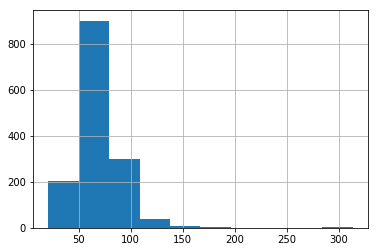

In [24]:
df['LotFrontage'].hist()

In [25]:
df.dropna(inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1338 non-null int64
MSZoning         1338 non-null object
LotFrontage      1338 non-null float64
LotArea          1338 non-null int64
Street           1338 non-null object
LotShape         1338 non-null object
LandContour      1338 non-null object
Utilities        1338 non-null object
LotConfig        1338 non-null object
LandSlope        1338 non-null object
Neighborhood     1338 non-null object
Condition1       1338 non-null object
Condition2       1338 non-null object
BldgType         1338 non-null object
HouseStyle       1338 non-null object
OverallQual      1338 non-null int64
OverallCond      1338 non-null int64
YearBuilt        1338 non-null int64
YearRemodAdd     1338 non-null int64
RoofStyle        1338 non-null object
RoofMatl         1338 non-null object
Exterior1st      1338 non-null object
Exterior2nd      1338 non-null object
MasVnrType       1338 no

In [27]:
df['MSSubClass'] = df['MSSubClass'].astype('object')


In [28]:
columns = pd.DataFrame(df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64']).index

In [29]:
for column in columns:
    df[column] = df[column].astype('category')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1338 non-null category
MSZoning         1338 non-null category
LotFrontage      1338 non-null float64
LotArea          1338 non-null int64
Street           1338 non-null category
LotShape         1338 non-null category
LandContour      1338 non-null category
Utilities        1338 non-null category
LotConfig        1338 non-null category
LandSlope        1338 non-null category
Neighborhood     1338 non-null category
Condition1       1338 non-null category
Condition2       1338 non-null category
BldgType         1338 non-null category
HouseStyle       1338 non-null category
OverallQual      1338 non-null int64
OverallCond      1338 non-null int64
YearBuilt        1338 non-null int64
YearRemodAdd     1338 non-null int64
RoofStyle        1338 non-null category
RoofMatl         1338 non-null category
Exterior1st      1338 non-null category
Exterior2nd      1338 non-nul

In [31]:
df = pd.get_dummies(df, drop_first=True)

In [32]:
from sklearn.model_selection import train_test_split

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

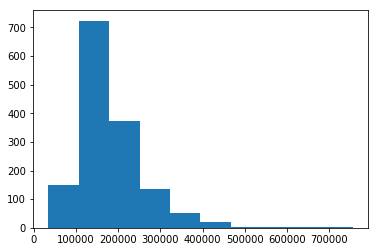

In [33]:
plt.hist(y)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

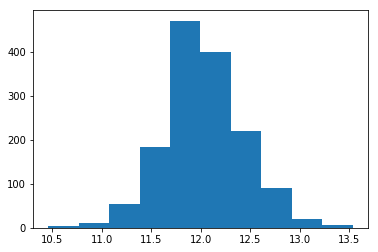

In [34]:
# taking the logarithm of the price accounts for the skewness
plt.hist(np.log(y))

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Columns: 241 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(205)
memory usage: 654.6 KB


In [36]:
y = df['SalePrice']
df = df.drop(columns = 'SalePrice', axis = 1)

In [37]:
X = df

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge

In [71]:
alphas = np.linspace(0.01, 20, 20)

In [72]:
alphas

array([1.00000000e-02, 1.06210526e+00, 2.11421053e+00, 3.16631579e+00,
       4.21842105e+00, 5.27052632e+00, 6.32263158e+00, 7.37473684e+00,
       8.42684211e+00, 9.47894737e+00, 1.05310526e+01, 1.15831579e+01,
       1.26352632e+01, 1.36873684e+01, 1.47394737e+01, 1.57915789e+01,
       1.68436842e+01, 1.78957895e+01, 1.89478947e+01, 2.00000000e+01])

In [75]:
cross_val_scores = []
test_scores = []
train_scores = []
best_score = 0
best_alpha = 0
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    train_scores.append(ridge.score(X_train, y_train))
    cross_val_scores.append(cross_val_score(ridge, X_train, y_train, cv = 10).mean())
    test_scores.append(ridge.score(X_test, y_test))
    if cross_val_score(ridge, X_train, y_train, cv = 10).mean() > best_score:
        best_alpha = alpha
    
    
    
    

In [81]:
ridge = Ridge(alpha = best_alpha)
ridge.fit(X_train, y_train)
y_preds = ridge.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_preds, y_test))
print('train score: ', ridge.score(X_train, y_train))
print('cross_val_score: ', cross_val_score(ridge, X_train, y_train, cv = 10).mean())
print('test score: ', ridge.score(X_test, y_test))
print('RMSE: ', RMSE)

train score:  0.9308183568002815
cross_val_score:  0.7519261283993958
test score:  0.7643058765437336
RMSE:  37525.287088692196


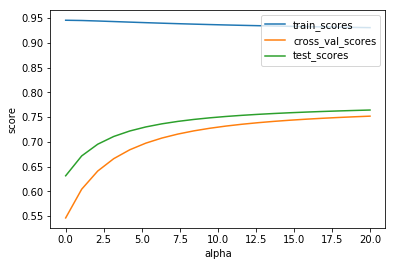

In [82]:
plt.plot(alphas, train_scores, label = 'train_scores')
plt.plot(alphas, cross_val_scores, label = 'cross_val_scores')
plt.plot(alphas, test_scores, label = 'test_scores')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend(loc = 'upper right');

In [79]:
pd.DataFrame(ridge.coef_, index = X.columns).sort_values(0, ascending = False)

,0
RoofMatl_CompShg,28653.097442
RoofMatl_WdShngl,20076.445120
GrLivArea,16876.345999
RoofMatl_Tar&Grv,16228.658068
2ndFlrSF,12812.023969
OverallQual,10891.640532
RoofMatl_WdShake,10706.069322
LotArea,8290.429213
1stFlrSF,8075.794989
RoofMatl_Membran,7764.040254


In [96]:
# Bias-Variance trade off
# Now, let's plot a model with fewer variables
high = list(df.corrwith(y).sort_values(ascending = False)[0:22].index)
low = list(df.corrwith(y).sort_values(ascending = False)[-8:].index)
features = high + low

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 '1stFlrSF',
 'TotalBsmtSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'Foundation_PConc',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'ExterQual_Gd',
 'BsmtFinType1_GLQ',
 'Neighborhood_NridgHt',
 'MSSubClass_60',
 'BsmtFinSF1',
 'SaleType_New',
 'SaleCondition_Partial',
 'Neighborhood_NoRidge',
 'HeatingQC_TA',
 'MasVnrType_None',
 'Foundation_CBlock',
 'GarageType_Detchd',
 'GarageFinish_Unf',
 'BsmtQual_TA',
 'KitchenQual_TA',
 'ExterQual_TA']

In [98]:
# including all features with a correlation of at least 0.3 positive and negative
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [99]:
cross_val_scores = []
test_scores = []
train_scores = []
best_score = 0
best_alpha = 0
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    train_scores.append(ridge.score(X_train, y_train))
    cross_val_scores.append(cross_val_score(ridge, X_train, y_train, cv = 10).mean())
    test_scores.append(ridge.score(X_test, y_test))
    if cross_val_score(ridge, X_train, y_train, cv = 10).mean() > best_score:
        best_alpha = alpha
    

In [100]:
ridge = Ridge(alpha = best_alpha)
ridge.fit(X_train, y_train)
y_preds = ridge.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_preds, y_test))
print('train score: ', ridge.score(X_train, y_train))
print('cross_val_score: ', cross_val_score(ridge, X_train, y_train, cv = 10).mean())
print('test score: ', ridge.score(X_test, y_test))
print('RMSE: ', RMSE)

train score:  0.8136950535677093
cross_val_score:  0.7784330020054288
test score:  0.7703729151992937
RMSE:  34460.50756739129


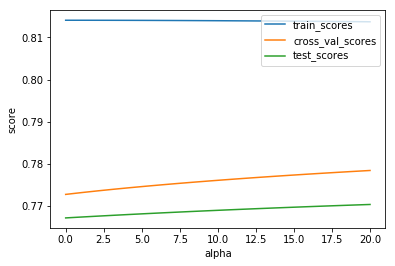

In [101]:
plt.plot(alphas, train_scores, label = 'train_scores')
plt.plot(alphas, cross_val_scores, label = 'cross_val_scores')
plt.plot(alphas, test_scores, label = 'test_scores')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend(loc = 'upper right');

In [102]:
pd.DataFrame(ridge.coef_, index = X.columns).sort_values(0, ascending = False)

,0
OverallQual,21104.826918
GrLivArea,17944.929405
GarageCars,10611.752386
Neighborhood_NoRidge,8344.474040
1stFlrSF,7492.842821
BsmtFinSF1,7365.992827
MasVnrArea,6874.742983
MasVnrType_None,6259.296078
Neighborhood_NridgHt,6124.293305
SaleType_New,5261.214824


In [52]:
# Interaction terms
